### importamos las librerias a utilizar

In [1]:
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input, Dropout
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
import os

2023-02-08 10:29:21.727808: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-08 10:29:21.955245: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-08 10:29:21.955268: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-08 10:29:23.452747: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
from fuzzypy import *
from fuzzypy.variables import *


### Preparacion de espacio de trabajo

especificamos la ruta de nuestro dataset, un arreglo para guardar las categorias que vayamos encontrando y la dimension a trabajar con nuestras imagenes

recorremos el direcotorio excluyendo las imagenes de testeo

In [3]:
DATADIR = '/home/lenin/Documents/datasets/colores'
CATEGORIES = []
IMG_SIZE=10

negative = ['testimg','old']
for cate in os.listdir(DATADIR):
    if cate in negative: continue
    CATEGORIES.append(cate)
print(f'categorias encontradas: {CATEGORIES}\n total: {len(CATEGORIES)}')

categorias encontradas: ['morado', 'azul', 'rojo', 'amarillo', 'gris', 'rosado', 'negro', 'naranja', 'celeste', 'verde', 'blanco', 'cafe']
 total: 12


### Recoleccion de datos
recorremos el directorio tomando cada imagen segun su respectiva categoria

In [4]:
def fuzzy_rojo(img_array):
    # Define a fuzzy variable for rojo color
    rojo = FuzzyVariable()
    verde = FuzzyVariable()
    azul = FuzzyVariable()

    # Define the membership functions
    muy = TriFunc(240, 245, 255)
    medio = TriFunc(230, 240, 245)
    nada = TriFunc(200, 225, 230)
    
    rg_muy = TriFunc(35, 40, 50)
    rg_medio = TriFunc(20, 25, 35)
    rg_nada = TriFunc(0, 12, 20)

    # Determine the fuzzy terms
    muy_rojo = rojo.is_(muy)
    medio_rojo = rojo.is_(medio)
    nada_rojo = rojo.is_(nada)
    
    muy_verde = verde.is_(rg_muy)
    medio_verde = verde.is_(rg_medio)
    nada_verde = verde.is_(rg_nada)

    muy_azul = azul.is_(rg_muy)
    medio_azul = azul.is_(rg_medio)
    nada_azul = azul.is_(rg_nada)

    # Define rules
    rule1 = FuzzyRule(nada_verde & nada_azul, muy_rojo)
    rule2 = FuzzyRule(medio_verde & medio_azul, medio_rojo)
    rule3 = FuzzyRule(muy_verde & muy_azul, nada_rojo)

    # Evaluate the rules
    r, g, b = img_array[:,:,0], img_array[:,:,1], img_array[:,:,2]
    apply_defuzzyfy_COG([rule1, rule2, rule3])
    result = rojo.value

    print(result)


In [5]:
training_data=[] #var para los datos recolectados
labels=0
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for fname in os.listdir(path):
        img = load_img((path+'/'+fname), target_size=(IMG_SIZE,IMG_SIZE))
        x = img_to_array(img)
        print(f'original {x.shape}')
        #  aqui para hacer fuzzy
        x = fuzzy_rojo(x)
        break
        x=x/255
        training_data.append([x,labels])
    break
    print(f'{category} : {labels}')
    labels+=1
print('done')

original (10, 10, 3)


TypeError: FuzzyRule.__init__() missing 1 required positional argument: 'membership'

verificamos el total de datos que tenemos

In [11]:
lenofimage = len(training_data)
print(lenofimage)

18480


### Tratamiento de los datos
separamos  nuestra data en img-labels y los tratamos con numpy

In [12]:
X=[]
y=[]
for img, label in training_data:
    X.append(img)
    y.append(label)
print('done')
del training_data

done


verificamos la forma de nuestra data

In [13]:
X=np.array(X)
y=np.array(y)
print('labels',y.shape)
print('img',X.shape)

labels (18480,)
img (18480, 3, 3, 3)


dividimos la data para train y test

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
print(f'train: {len(X_train)}, test: {len(X_test)}')
del X
del y

train: 13860, test: 4620


In [16]:
print(X_train.shape)

(13860, 3, 3, 3)


In [17]:
X_train

array([[[[0.7921569 , 0.7882353 , 0.81960785],
         [0.8235294 , 0.81960785, 0.8392157 ],
         [0.8235294 , 0.8235294 , 0.8235294 ]],

        [[0.84313726, 0.84705883, 0.8666667 ],
         [0.84313726, 0.84313726, 0.84313726],
         [0.89411765, 0.89411765, 0.89411765]],

        [[0.8784314 , 0.8784314 , 0.8862745 ],
         [0.8666667 , 0.8666667 , 0.8666667 ],
         [0.8627451 , 0.8627451 , 0.8627451 ]]],


       [[[0.9647059 , 0.9647059 , 0.9647059 ],
         [0.96862745, 0.96862745, 0.96862745],
         [0.9647059 , 0.9647059 , 0.9647059 ]],

        [[0.9607843 , 0.9607843 , 0.9607843 ],
         [0.9647059 , 0.9647059 , 0.9647059 ],
         [0.9490196 , 0.9490196 , 0.9490196 ]],

        [[0.93333334, 0.93333334, 0.93333334],
         [0.9372549 , 0.9372549 , 0.9372549 ],
         [0.92941177, 0.92941177, 0.92941177]]],


       [[[0.9137255 , 0.9137255 , 0.9137255 ],
         [0.79607844, 0.79607844, 0.79607844],
         [0.9019608 , 0.9019608 , 0.9019608 

### Creacion del modelo
creamos la arquitectura del modelo, lo compilamos y finalmente ajustamos

In [78]:
#  3x3 
model = Sequential()
model.add(Flatten(input_shape=(X_train[0].shape)))
model.add(Dense(6, activation='relu'))
model.add(Dense(len(CATEGORIES), activation='softmax'))


In [25]:
# model = Sequential([
#     Conv2D(32, (2,2), activation='relu', padding='SAME', input_shape=X_train[0].shape),
#     MaxPooling2D((2,2)),
#     Flatten(),
#     Dense(10, activation='relu'),
#     Dense(len(CATEGORIES), activation='softmax'),
# ])

In [32]:
# 30 30
# model = Sequential()

# model.add(Conv2D(18, (1, 1), activation='relu', padding='SAME', input_shape=X_train[0].shape))
# model.add(MaxPooling2D((2, 2)))

# model.add(Conv2D(64, (3, 3), padding='SAME', activation='relu'))
# model.add(MaxPooling2D((2, 2)))

# model.add(Flatten())
# model.add(Dense(10, activation='relu'))
# model.add(Dense(len(CATEGORIES), activation='softmax'))

# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [79]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=12, batch_size=25)

Epoch 1/12
555/555 [==============================] - 3s 4ms/step - loss: 1.9332 - accuracy: 0.3477
Epoch 2/12
555/555 [==============================] - 2s 4ms/step - loss: 0.9808 - accuracy: 0.8162
Epoch 3/12
555/555 [==============================] - 2s 4ms/step - loss: 0.5772 - accuracy: 0.8802
Epoch 4/12
555/555 [==============================] - 2s 4ms/step - loss: 0.4125 - accuracy: 0.9060
Epoch 5/12
555/555 [==============================] - 2s 4ms/step - loss: 0.3308 - accuracy: 0.9216
Epoch 6/12
555/555 [==============================] - 2s 4ms/step - loss: 0.2817 - accuracy: 0.9262
Epoch 7/12
555/555 [==============================] - 2s 4ms/step - loss: 0.2501 - accuracy: 0.9295
Epoch 8/12
555/555 [==============================] - 2s 4ms/step - loss: 0.2275 - accuracy: 0.9334
Epoch 9/12
555/555 [==============================] - 2s 4ms/step - loss: 0.2105 - accuracy: 0.9362
Epoch 10/12
555/555 [==============================] - 2s 4ms/step - loss: 0.1972 - accuracy: 0.9382

verificamos la precis_ion en testeo

In [80]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print('test loss',test_loss)
print('test accuracy',test_accuracy)

test loss 0.1726434826850891
test accuracy 0.9435064792633057


In [113]:
import sys
sys.path.append('/home/lenin/Documents/GitHub/ScriptsPython/')
import datag as dg
modelo_cargado = tf.keras.models.load_model("mod_color_v1_3x3.h5")
modelo_cargado.load_weights("mod_color_v1_weights_3x3.h5")


path = '/home/lenin/Documents/GitHub/Modelo-para-clasificacion-de-colores-ANN/imgs'
imgs = dg.extraer_nombres(path,['frame'])

for name in imgs:
    img = load_img(dg.os.path.join(path,name), target_size=(IMG_SIZE,IMG_SIZE))
    x = img_to_array(img)
    x=x/255
    x = x[np.newaxis_, ...]
    resp = modelo_cargado.projoict(x, verbose=0)
    print(f' label: {np.argmax(resp[0])}  clase: {CATEGORIES[np.argmax(resp[0])]}')
    

 label: 11  clase: cafe
 label: 1  clase: azul
 label: 11  clase: cafe
 label: 5  clase: rosado
 label: 4  clase: gris
 label: 8  clase: celeste
 label: 4  clase: gris
 label: 4  clase: gris
 label: 4  clase: gris
 label: 4  clase: gris


### Probamos el modelo entrenado

prediccion = azul


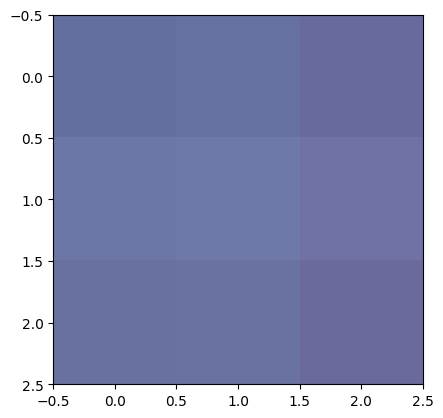

In [104]:

#tratamos la img con el mis_mo tamanio y la normalizamos
img = load_img(path, target_size=(IMG_SIZE,IMG_SIZE))
x = img_to_array(img)
x=x/255

#agrego un eje para que el modelo lo reciba
x = x[np.newaxis_, ...]

#imprimo la img y la projoiccion
plt.imshow(img)
resp = modelo_cargado.projoict(x, verbose=0)
print(f'projoiccion = {CATEGORIES[np.argmax(resp[0])]}')

### Exportacion
con el modelo ya funcionando correctamente, lo exportamos para poder utilizarlo en otros proyectos

In [81]:
model.save('mod_color_v1_3x3.h5')
model.save_weights("mod_color_v1_weights_3x3.h5")

In [ ]:
# model.save('mod_color_v1_1x1.h5')
# model.save_weights("mod_color_v1_weights_1x1.h5")

para cargarlos

In [17]:
# # Cargar la estructura del modelo
# modelo_cargado = tf.keras.models.load_model("mod_color_v1.h5")

# # Cargar los pesos del modelo
# modelo_cargado.load_weights("mod_color_v1_weights.h5")
# convd 
# drop out 
# max poling 
# padding 